# Descriptive Statistics with `R` Exercises

Like last week, all of the concepts in the exercise will be familiar in the sense that it will mirror the concepts that we learned throughout the labs and practices. This includes the concepts that we worked through in module 1.

There could be multiple ways to solve a single answer, some more elegant than others. Revisit older notebooks for guidance, ask questions along the way, and don't be afraid to search the internet. Chances are that someone has had the same/similar issue.

For this exercise, we will be working with the `congress-terms.csv`. 
Again, this is in the `/dsa/data/all_datasets/` directory.

**Exercise 1**: *Read in the `congress-terms.csv` file and name it `df`.*

In [2]:
# Exercise 1 code goes here
# -------------------------
df <- read.csv('/dsa/data/all_datasets/congress-terms.csv')
#head(df)

congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
80,house,M000112,Joseph,Jefferson,Mansfield,,1861-02-09,TX,D,Yes,1/3/47,85.9
80,house,D000448,Robert,Lee,Doughton,,1863-11-07,NC,D,Yes,1/3/47,83.2
80,house,S000001,Adolph,Joachim,Sabath,,1866-04-04,IL,D,Yes,1/3/47,80.7
80,house,E000023,Charles,Aubrey,Eaton,,1868-03-29,NJ,R,Yes,1/3/47,78.8
80,house,L000296,William,,Lewis,,1868-09-22,KY,R,No,1/3/47,78.3
80,house,G000017,James,A.,Gallagher,,1869-01-16,PA,R,No,1/3/47,78.0


**Exercise 2**: On average, does the house or the senate have older members? What statistics could you use to find this?

In [16]:
# Exercise 2 code goes here
# -------------------------
library(dplyr)

df %>%
group_by(chamber) %>%
summarize(meanAge = mean(age), medianAge = median(age))

chamber,meanAge,medianAge
<fct>,<dbl>,<dbl>
house,52.36661,52.0
senate,57.33553,56.8


**Exercise 3**: Who is the oldest person in this dataset? The youngest?

In [9]:
# Exercise 3 code goes here
# -------------------------
df %>%
top_n(n = 1, wt = -age)

df %>%
top_n(n = 1, wt = age)

congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
89,house,J000151,Jed,Joseph,Johnson,Jr.,12/27/39,OK,D,No,1/4/65,25


congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
107,senate,T000254,J.,Strom,Thurmond,,1902-12-05,SC,R,Yes,1/3/01,98.1


**Exercise 4**: Who is the oldest and youngest person per political party?

In [13]:
# Exercise 4 code goes here
# -------------------------
df %>%
group_by(party) %>%
top_n(n = 1, wt = -age)

df %>%
group_by(party) %>%
top_n(n = 1, wt = age)

congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
86,house,A000105,Thomas,Dale,Alford,,1/28/16,AR,ID,No,1/7/59,42.9
80,house,I000046,Leo,,Isacson,,4/20/10,NY,AL,No,1/3/47,36.7
88,senate,M000851,Walter,Frederick,Mondale,,1/5/28,MN,I,No,1/9/63,35.0
81,house,R000425,Franklin,Delano,Roosevelt,Jr.,8/17/14,NY,L,No,1/3/49,34.4
94,house,E000175,David,Farnham,Emery,,9/1/48,ME,R,No,1/14/75,26.4
107,house,P000586,Adam,H.,Putnam,,7/31/74,FL,R,No,1/3/01,26.4
89,house,J000151,Jed,Joseph,Johnson,Jr.,12/27/39,OK,D,No,1/4/65,25.0


congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
81,house,R000425,Franklin,Delano,Roosevelt,Jr.,8/17/14,NY,L,No,1/3/49,34.4
81,house,M000122,Vito,Anthony,Marcantonio,,1902-12-10,NY,AL,Yes,1/3/49,46.1
111,senate,L000304,Joseph,I.,Lieberman,,2/24/42,CT,ID,Yes,1/6/09,66.9
113,senate,S000033,Bernard,,Sanders,,9/8/41,VT,I,Yes,1/3/13,71.3
111,senate,B001210,Robert,C.,Byrd,,11/19/13,WV,D,Yes,1/6/09,95.1
107,senate,T000254,J.,Strom,Thurmond,,1902-12-05,SC,R,Yes,1/3/01,98.1


There is a column in this data frame called `bioguide`. This is a unique id for each individual in the data set. As you are probably aware, many politicians have multiple terms.

**Exercise 5**: Who is the politician with the most terms?

In [75]:
# Exercise 5 code goes here
# -------------------------
df %>%
group_by(bioguide, firstname, lastname) %>%
#arrange(count(bioguide))
summarize(terms = n()) %>%
#mostTerms <- subset(df$terms)
#top_n(1, wt = terms)
#head(numTerms[order(numTerms$terms, decreasing = TRUE), ])
arrange(desc(terms))

bioguide,firstname,lastname,terms
<fct>,<fct>,<fct>,<int>
D000355,John,Dingell,30
B001210,Robert,Byrd,29
I000025,Daniel,Inouye,27
T000254,J.,Thurmond,26
C000714,John,Conyers,25
K000105,Edward,Kennedy,25
W000428,Jamie,Whitten,24
Y000013,Sidney,Yates,24
B000371,Charles,Bennett,22


**Exercise 6**: Who has had the most Senate terms? House terms?

In [77]:
# Exercise 6 code goes here
# -------------------------
df %>%
group_by(bioguide, chamber, firstname, lastname) %>%
summarize(terms = n()) %>%
arrange(desc(terms))

bioguide,chamber,firstname,lastname,terms
<fct>,<fct>,<fct>,<fct>,<int>
D000355,house,John,Dingell,30
B001210,senate,Robert,Byrd,26
T000254,senate,J.,Thurmond,26
C000714,house,John,Conyers,25
I000025,senate,Daniel,Inouye,25
K000105,senate,Edward,Kennedy,25
W000428,house,Jamie,Whitten,24
Y000013,house,Sidney,Yates,24
B000371,house,Charles,Bennett,22


**Challenge Exercise 1**: Using the mean, which party on average holds a higher number of terms per politician? 

In [102]:
# Challenge Exercise 1 code goes here
# -----------------------------------
df %>%
group_by(bioguide, party) %>%
summarize(terms = n()) %>%
group_by(party) %>%
summarize(AvgTerms = mean(terms)) %>%
arrange(desc(AvgTerms))

party,AvgTerms
<fct>,<dbl>
D,6.213768
R,5.341511
I,3.500000
AL,1.500000
ID,1.333333
L,1.000000


**Challenge Exercise 2**: Using the median age, what condition has the strongest linear relationship: Congress Number and Republican House age, Congress Number and Republican Senate age, Congress Number and Democratic House age, or Congress Number and Democratic Senate age.

In [134]:
# Challenge Exercise 2 code goes here
# -----------------------------------
repHouse <- df %>%
group_by(congress, chamber, party) %>%
filter(chamber == "house" & party == "R") %>%
summarize(repHouseAge = median(age))
cor(repHouse$congress, repHouse$repHouseAge)

repSenate <- df %>%
group_by(congress, chamber, party) %>%
filter(chamber == "senate" & party == "R") %>%
summarize(repSenateAge = median(age))
cor(repSenate$congress, repSenate$repSenateAge)

demHouse <- df %>%
group_by(congress, chamber, party) %>%
filter(chamber == "house" & party == "D") %>%
summarize(demHouseAge = median(age))
cor(demHouse$congress, demHouse$demHouseAge)

demSenate <- df %>%
group_by(congress, chamber, party) %>%
filter(chamber == "senate" & party == "D") %>%
summarize(demSenateAge = median(age))
cor(demSenate$congress, demSenate$demSenateAge)

[1] 0.1232472

[1] 0.1914079

[1] 0.6840837

[1] 0.5946323

**Exercise 7**: Plot the relationship with the strongest linear relationship to visualize the results.

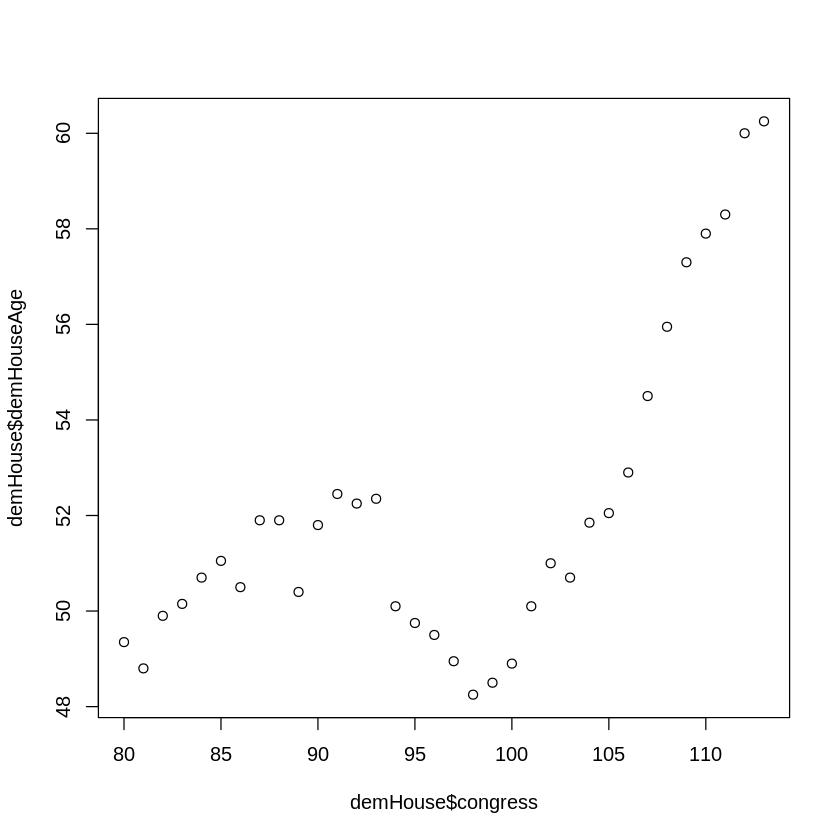

In [130]:
# Exercise 7 code goes here
# -------------------------
plot(demHouse$congress, demHouse$demHouseAge)


# Save your notebook, then `File > Close and Halt`